<a href="https://colab.research.google.com/github/farhanarrafi/empirical-analysis-cardiovascular-data/blob/main/Emperical_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiovascular Data Analysis using Statistical Methods

## Feature Description


age: Age of the patient in days.
.
gender: Gender of the patient. Categorical variable (1: Female, 2: Male).
height: Height of the patient in centimeters.
weight: Weight of the patient in kilograms.
ap_hi: Systolic blood pressure.
ap_lo: Diastolic blood pressure.

* ID: Unique identifier for each patient.
* age_years: Age of the patient in years
* height: Height of the patient in centimeters.
* weight: Weight of the patient in kilograms.
* ap_hi: Systolic blood pressure.
* ap_lo: Diastolic blood pressure.
* bmi: Body Mass Index, derived from weight and height. Calculated as *BMI = weight / height^2*
* bp_category: Blood pressure category based on ap_hi and ap_lo. Categories include "Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2", and "Hypertensive Crisis".



## Data Import

Dataset srouce: https://www.kaggle.com/datasets/colewelkins/cardiovascular-disease


In [2]:
import os.path
import json


api_token = {"username":"farhanarrafi","key":"074ead27713d782ad86b0e445765e799"}

if not os.path.isdir('/root/.kaggle'):
  ! mkdir ~/.kaggle
  ! touch ~/.kaggle/kaggle.json
  with open('/root/.kaggle/kaggle.json', 'w') as file:
      json.dump(api_token, file)
  !chmod 600 ~/.kaggle/kaggle.json

#! kaggle datasets list

In [3]:
if not os.path.isfile('cardio_data_processed.csv'):
  ! kaggle datasets download -d colewelkins/cardiovascular-disease
  ! unzip cardiovascular-disease.zip
  ! rm -rf cardiovascular-disease.zip

  0% 0.00/1.43M [00:00<?, ?B/s]
100% 1.43M/1.43M [00:00<00:00, 130MB/s]
Archive:  cardiovascular-disease.zip
  inflating: cardio_data_processed.csv  


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

cardioVascular_dataset = pd.read_csv('cardio_data_processed.csv')

# Remove columns
cardioVascular_dataset = cardioVascular_dataset.drop(axis='columns', columns=['age','gender', 'cholesterol','gluc','smoke','alco', 'active','cardio', 'bp_category_encoded'])
# Setting index
cardioVascular_dataset = cardioVascular_dataset.set_index('id')
# Remove bp categories other than Hypertension Stage 1 and 2
cardioVascular_dataset_filtered = cardioVascular_dataset.loc[(cardioVascular_dataset['bp_category'] == 'Hypertension Stage 1') |  (cardioVascular_dataset['bp_category'] == 'Hypertension Stage 2')]


In [5]:
# Select first 2000
cardioVascular_dataset_filtered = cardioVascular_dataset_filtered.sample(5000, random_state=111)
# Check for null values
cardioVascular_dataset_filtered.isna().sum().sum()

0

In [45]:
cardioVascular_dataset_filtered.head(10)

,height,weight,ap_hi,ap_lo,age_years,bmi,bp_category
id,,,,,,,
24555,158,61.0,140,90,57,24.435187,Hypertension Stage 2
1899,150,71.0,150,90,60,31.555556,Hypertension Stage 2
65058,168,70.0,120,80,59,24.801587,Hypertension Stage 1
11598,165,74.0,130,80,48,27.180900,Hypertension Stage 1
44039,158,65.0,130,80,50,26.037494,Hypertension Stage 1
57235,155,80.0,160,90,60,33.298647,Hypertension Stage 2
93406,171,73.0,140,90,49,24.964946,Hypertension Stage 2
61564,159,48.0,110,80,39,18.986591,Hypertension Stage 1
43417,170,77.0,120,80,54,26.643599,Hypertension Stage 1


In [6]:
len(cardioVascular_dataset_filtered)

5000

In [7]:
cardioVascular_dataset_filtered.mean()

<ipython-input-7-691787149147>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cardioVascular_dataset_filtered.mean()


height       164.575000
weight        75.295860
ap_hi        130.267800
ap_lo         84.179400
age_years     53.487000
bmi           27.940187
dtype: float64

<Axes: ylabel='Density'>

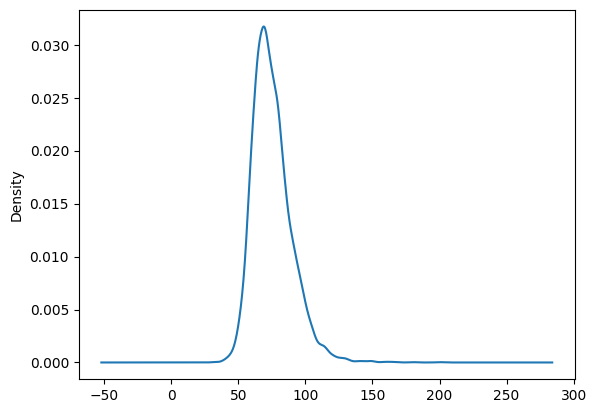

In [8]:
cardioVascular_dataset_filtered['weight'].plot.density()

In [9]:
samples = cardioVascular_dataset_filtered.sample(100, random_state=1199)
# Check for null values https://stackoverflow.com/a/69622929/3148856
samples.isna().sum().sum()

0

In [10]:
samples.max()

height                          189
weight                        129.0
ap_hi                           180
ap_lo                           120
age_years                        64
bmi                       41.007403
bp_category    Hypertension Stage 2
dtype: object

In [11]:
samples.min()

height                          148
weight                         50.0
ap_hi                           100
ap_lo                            70
age_years                        39
bmi                       16.514731
bp_category    Hypertension Stage 1
dtype: object

In [12]:
samples[samples['weight'] <= 50]

,height,weight,ap_hi,ap_lo,age_years,bmi,bp_category
id,,,,,,,
27835,174,50.0,120,80,41,16.514731,Hypertension Stage 1


<Axes: ylabel='Density'>

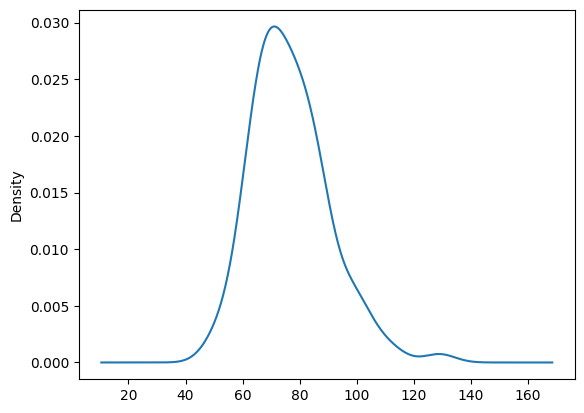

In [13]:
samples['weight'].plot.density()

<Axes: >

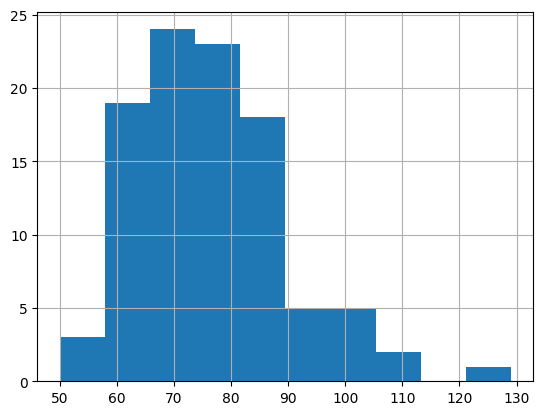

In [14]:
samples['weight'].hist()

In [15]:
# Grid code was provided by Chat GPT version 3 using the prompt - [how to print one column data contaning 20 items from a dataframe into a 4 by 5 grid]
# Reshape the 1D array into a 2D array with a shape of (4, 5)
grid_data = np.reshape(samples['weight'].to_numpy(), (10, 10))

# Loop through rows and print the data
for row in grid_data:
    print(','.join(map(str, row)))

65.0,78.0,75.0,72.0,85.0,70.0,100.0,70.0,98.0,86.0
97.0,129.0,108.0,79.0,63.0,80.0,75.0,63.0,75.0,52.0
63.0,70.0,87.0,87.0,88.0,59.0,80.0,89.0,72.0,65.0
83.0,80.0,62.0,80.0,64.0,62.0,80.0,75.0,84.0,68.0
78.0,66.0,71.0,91.0,59.0,80.0,50.0,53.0,76.0,68.0
73.0,58.0,86.0,100.0,87.0,71.0,80.0,66.0,68.0,62.0
69.0,80.0,69.0,65.0,65.0,67.0,62.0,76.0,88.0,92.0
86.0,82.0,97.0,102.0,89.0,65.0,71.0,76.0,69.0,58.0
65.0,70.0,113.0,69.0,73.0,78.0,72.0,95.0,85.0,104.0
82.0,65.0,87.0,70.0,84.0,80.0,74.0,74.0,79.0,71.0


In [16]:
samples.describe()

,height,weight,ap_hi,ap_lo,age_years,bmi
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,163.890000,76.79000,130.100000,84.870000,53.520000,28.611298
std,8.247307,13.58497,14.615959,7.950167,6.802376,4.642349
min,148.000000,50.00000,100.000000,70.000000,39.000000,16.514731
25%,158.000000,67.75000,120.000000,80.000000,49.000000,25.154073
50%,164.000000,75.00000,125.000000,80.000000,55.000000,28.037327
75%,168.000000,85.00000,140.000000,90.000000,59.000000,32.013299
max,189.000000,129.00000,180.000000,120.000000,64.000000,41.007403


In [17]:
samples.mean()

<ipython-input-17-8111d020ec13>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  samples.mean()


height       163.890000
weight        76.790000
ap_hi        130.100000
ap_lo         84.870000
age_years     53.520000
bmi           28.611298
dtype: float64

In [18]:
samples.std()

<ipython-input-18-70cfbb258cf1>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  samples.std()


height        8.247307
weight       13.584970
ap_hi        14.615959
ap_lo         7.950167
age_years     6.802376
bmi           4.642349
dtype: float64

In [19]:
len(samples[samples['weight'] > 70])

63

In [20]:
from scipy.stats.mstats import ttest_1samp
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
from statsmodels.stats.weightstats import ttest_ind

test_statistic = ttest_1samp(samples['weight'], popmean= 60, alternative='greater')

print(test_statistic)

Ttest_1sampResult(statistic=12.359246878796654, pvalue=4.401633132970351e-22)


In [21]:
from statsmodels.stats.proportion import proportions_ztest

zstat, pval = proportions_ztest(63, 100, value=0.5, prop_var=False, alternative='larger')

print('zstat: ',zstat)
print('pval: ',pval)

zstat:  2.6926023193385333
pval:  0.003544838884025079


In [22]:
from statsmodels.stats.proportion import proportion_confint

result = proportion_confint(63, 100, alpha=0.05, method='beta')
print(result)

(0.527648359448317, 0.7244334203854486)


In [23]:
# ap_hi_lo_samples = cardioVascular_dataset_filtered.sample(100, random_state=1199)
# # Check for null values https://stackoverflow.com/a/69622929/3148856
# ap_hi_lo_samples.isna().sum().sum()

In [24]:
ap_hi_grid_data = np.reshape(samples['ap_hi'].to_numpy(), (10, 10))

# Loop through rows and print the data
for row in ap_hi_grid_data:
    print(','.join(map(str, row)))

150,140,120,120,130,130,140,120,120,130
120,140,140,120,120,130,130,130,130,140
120,120,140,120,145,130,120,130,120,120
130,140,140,170,120,140,130,130,160,140
110,120,120,150,120,140,120,120,110,140
160,110,140,140,120,130,120,120,100,140
120,120,170,120,140,150,140,115,110,140
160,120,120,130,120,150,120,120,120,110
120,120,120,120,120,140,120,120,140,120
120,120,120,130,140,180,120,150,160,140


In [25]:
ap_hi_grid_data = np.reshape(samples['ap_lo'].to_numpy(), (10, 10))

# Loop through rows and print the data
for row in ap_hi_grid_data:
    print(','.join(map(str, row)))

100,90,80,80,90,80,80,80,80,70
80,90,90,80,80,80,90,82,90,80
80,80,120,80,90,80,80,90,80,80
90,90,90,110,80,80,90,90,100,90
80,80,80,80,80,90,80,80,80,90
90,90,90,100,80,80,80,80,80,80
80,80,100,80,90,100,90,80,80,80
90,80,80,90,80,90,80,80,80,80
80,80,100,80,90,80,85,80,100,80
80,80,80,70,80,90,80,90,100,80


In [26]:
#ap_lo_samples = cardioVascular_dataset_filtered['ap_lo'].sample(100, random_state=1199)
# Check for null values https://stackoverflow.com/a/69622929/3148856
#ap_lo_samples.isna().sum().sum()

In [27]:
samples['ap_hi'].describe()

count    100.000000
mean     130.100000
std       14.615959
min      100.000000
25%      120.000000
50%      125.000000
75%      140.000000
max      180.000000
Name: ap_hi, dtype: float64

In [28]:
samples['ap_lo'].describe()

count    100.000000
mean      84.870000
std        7.950167
min       70.000000
25%       80.000000
50%       80.000000
75%       90.000000
max      120.000000
Name: ap_lo, dtype: float64

In [29]:
samples['weight'].describe()

count    100.00000
mean      76.79000
std       13.58497
min       50.00000
25%       67.75000
50%       75.00000
75%       85.00000
max      129.00000
Name: weight, dtype: float64

In [30]:
samples['ap_hi'].describe()

count    100.000000
mean     130.100000
std       14.615959
min      100.000000
25%      120.000000
50%      125.000000
75%      140.000000
max      180.000000
Name: ap_hi, dtype: float64

In [31]:
weight_ap_hi_difference = samples['weight'] - samples['ap_hi']



weight_ap_hi_difference_grid_data = np.reshape(weight_ap_hi_difference.to_numpy(), (10, 10))

# Loop through rows and print the data
for row in weight_ap_hi_difference_grid_data:
    print(','.join(map(str, row)))

-85.0,-62.0,-45.0,-48.0,-45.0,-60.0,-40.0,-50.0,-22.0,-44.0
-23.0,-11.0,-32.0,-41.0,-57.0,-50.0,-55.0,-67.0,-55.0,-88.0
-57.0,-50.0,-53.0,-33.0,-57.0,-71.0,-40.0,-41.0,-48.0,-55.0
-47.0,-60.0,-78.0,-90.0,-56.0,-78.0,-50.0,-55.0,-76.0,-72.0
-32.0,-54.0,-49.0,-59.0,-61.0,-60.0,-70.0,-67.0,-34.0,-72.0
-87.0,-52.0,-54.0,-40.0,-33.0,-59.0,-40.0,-54.0,-32.0,-78.0
-51.0,-40.0,-101.0,-55.0,-75.0,-83.0,-78.0,-39.0,-22.0,-48.0
-74.0,-38.0,-23.0,-28.0,-31.0,-85.0,-49.0,-44.0,-51.0,-52.0
-55.0,-50.0,-7.0,-51.0,-47.0,-62.0,-48.0,-25.0,-55.0,-16.0
-38.0,-55.0,-33.0,-60.0,-56.0,-100.0,-46.0,-76.0,-81.0,-69.0


In [32]:
weight_ap_lo_difference = samples['weight'] - samples['ap_lo']

weight_ap_lo_difference_grid_data = np.reshape(weight_ap_lo_difference.to_numpy(), (10, 10))

# Loop through rows and print the data
for row in weight_ap_lo_difference_grid_data:
    print(','.join(map(str, row)))

-35.0,-12.0,-5.0,-8.0,-5.0,-10.0,20.0,-10.0,18.0,16.0
17.0,39.0,18.0,-1.0,-17.0,0.0,-15.0,-19.0,-15.0,-28.0
-17.0,-10.0,-33.0,7.0,-2.0,-21.0,0.0,-1.0,-8.0,-15.0
-7.0,-10.0,-28.0,-30.0,-16.0,-18.0,-10.0,-15.0,-16.0,-22.0
-2.0,-14.0,-9.0,11.0,-21.0,-10.0,-30.0,-27.0,-4.0,-22.0
-17.0,-32.0,-4.0,0.0,7.0,-9.0,0.0,-14.0,-12.0,-18.0
-11.0,0.0,-31.0,-15.0,-25.0,-33.0,-28.0,-4.0,8.0,12.0
-4.0,2.0,17.0,12.0,9.0,-25.0,-9.0,-4.0,-11.0,-22.0
-15.0,-10.0,13.0,-11.0,-17.0,-2.0,-13.0,15.0,-15.0,24.0
2.0,-15.0,7.0,0.0,4.0,-10.0,-6.0,-16.0,-21.0,-9.0


In [33]:
weight_ap_hi_difference.describe()

count    100.000000
mean     -53.310000
std       18.849588
min     -101.000000
25%      -62.000000
50%      -52.500000
75%      -40.750000
max       -7.000000
dtype: float64

In [34]:
weight_ap_lo_difference.describe()

count    100.000000
mean      -8.080000
std       14.315831
min      -35.000000
25%      -17.000000
50%      -10.000000
75%        0.000000
max       39.000000
dtype: float64

<Axes: >

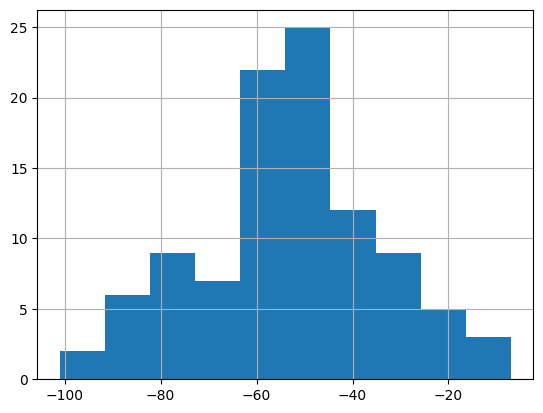

In [35]:
weight_ap_hi_difference.hist()


<Axes: >

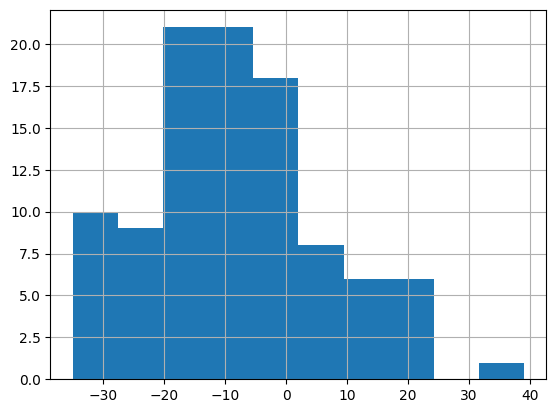

In [36]:
weight_ap_lo_difference.hist()

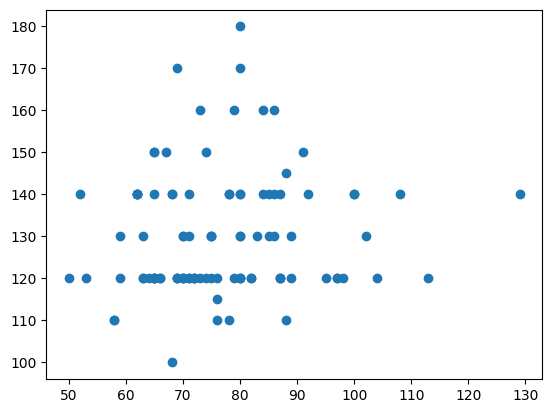

In [37]:
import matplotlib.pyplot as plt

x = samples['weight']
y = samples['ap_hi']

plt.scatter(x, y)
plt.show()

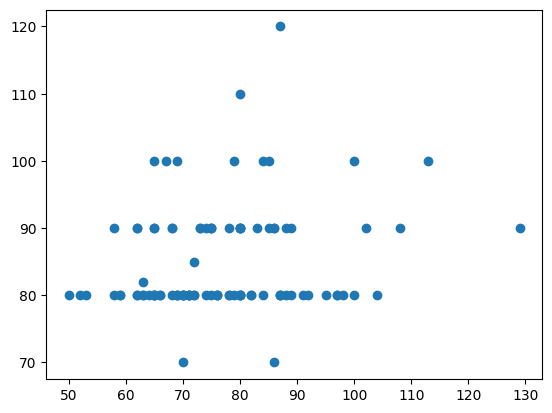

In [38]:
x = samples['weight']
y = samples['ap_lo']

plt.scatter(x, y)
plt.show()

In [39]:
x = samples['weight']
y = samples['ap_hi']

Zx = (x - x.mean()) / x.std()
Zy = (y - y.mean()) / y.std()
correlationR = np.multiply(Zx,Zy).sum() / (len(x)- 1)
print('weight and Systolic Blood Pressure correlation: ',correlationR)

weight and Systolic Blood Pressure correlation:  0.10795546708354092


In [40]:
x = samples['weight']
y = samples['ap_lo']

Zx = (x - x.mean()) / x.std()
Zy = (y - y.mean()) / y.std()
correlationR = np.multiply(Zx,Zy).sum() / (len(x)- 1)
print('weight and Diastolic Blood Pressure correlation: ',correlationR)

weight and Diastolic Blood Pressure correlation:  0.19820571321253885


Correlation confidence: https://zhiyzuo.github.io/Pearson-Correlation-CI-in-Python/

In [41]:
from scipy import stats

x = samples['weight']
y1 = samples['ap_hi']
y2 = samples['ap_lo']

pearsonR1 = stats.pearsonr(x,y1)
pearsonR2 = stats.pearsonr(x,y2)
print('weight and ap_hi correlation: ', pearsonR1.correlation)
print('weight and ap_lo correlation: ', pearsonR2.correlation)

weight and ap_hi correlation:  0.10795546708354091
weight and ap_lo correlation:  0.1982057132125388


In [42]:
pearsonR1_CI = pearsonR1.confidence_interval(confidence_level=0.95)
pearsonR2_CI = pearsonR2.confidence_interval(confidence_level=0.95)

print('weight and ap_hi correlation CI: ', pearsonR1_CI)
print('weight and ap_lo correlation CI: ', pearsonR2_CI)

weight and ap_hi correlation CI:  ConfidenceInterval(low=-0.09037908575559124, high=0.29805353550469366)
weight and ap_lo correlation CI:  ConfidenceInterval(low=0.001860007855474083, high=0.379836348657462)


## Dummies https://stackoverflow.com/a/53756024/3148856

In [135]:
from scipy import stats

#bp_category_types = list(set(samples['bp_category']))

Y = pd.get_dummies(data = samples['bp_category'], drop_first=True)
#print(Y)

X = samples['weight']

samples.groupby("bp_category")["weight"].mean()

#res = stats.linregress(X, Y)


bp_category
Hypertension Stage 1    75.591549
Hypertension Stage 2    79.724138
Name: weight, dtype: float64

In [136]:
X = X.to_frame()

In [177]:
test_samples = cardioVascular_dataset_filtered.sample(100, random_state=19)
# Check for null values https://stackoverflow.com/a/69622929/3148856
X_test = test_samples['weight'].to_frame()
Y_test = pd.get_dummies(data = test_samples['bp_category'], drop_first=True)

In [178]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression().fit(X, Y)

Y_predictions = reg.predict(X_test)

In [179]:
reg.score(X,Y)

0.019246338896240167

In [180]:
# slope
reg.coef_

array([[0.00465721]])

In [181]:
# intercept
reg.intercept_

array([-0.06762726])

In [182]:
X_test['weight'].max()

130.0

In [183]:
#Y_test = -0.06762726 + 0.00465721 * X_test['weight']

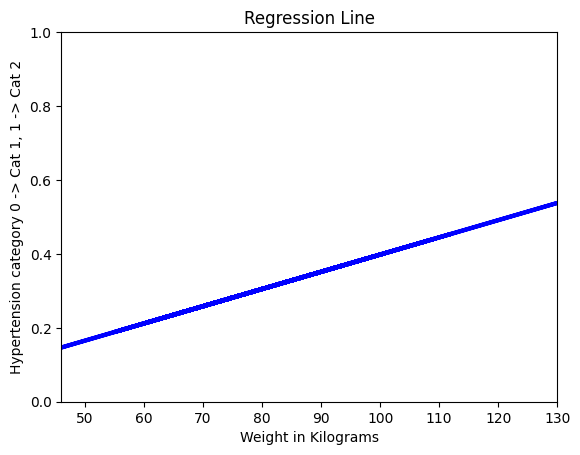

In [184]:

#plt.scatter(X_test, Y_test, color="black")
plt.title('Regression Line')
plt.xlabel('Weight in Kilograms')
plt.ylabel('Hypertension category 0 -> Cat 1, 1 -> Cat 2')
plt.xlim([X_test['weight'].min(), X_test['weight'].max()])
plt.ylim([0, 1])
#plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, Y_predictions, color="blue", linewidth=3)

In [194]:
# residual = observed y - predicted y
residual = Y_test - Y_predictions

Hypertension Stage 2    0.853396
dtype: float64

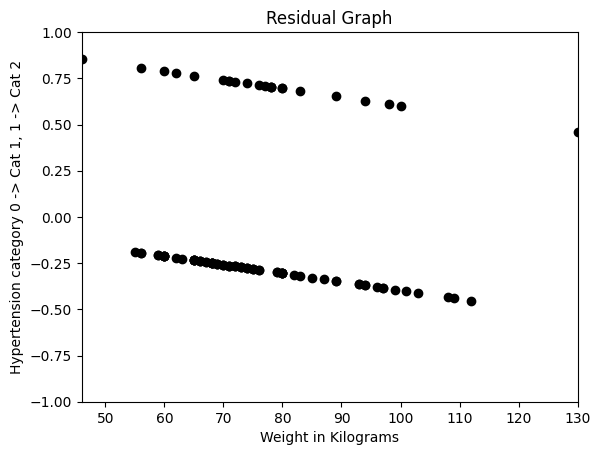

In [202]:
plt.title('Residual Graph')
plt.xlabel('Weight in Kilograms')
plt.ylabel('Hypertension category 0 -> Cat 1, 1 -> Cat 2')
plt.xlim([X_test['weight'].min(), X_test['weight'].max()])
plt.ylim([-1, 1])
plt.scatter(X_test, residual, color="black")
#plt.plot(X_test, Y_predictions, color="blue", linewidth=3)

# References


1.   https://stackoverflow.com/a/57401752

